In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip freeze

Importing Data dan Inspection

In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Dataset/data_retail.csv', sep=';')

Data Cleansing

copy data

In [4]:
df_copy = df.copy()
print(df_copy.head())
print('info dataset')
print(df_copy.dtypes)

   no  Row_Num  Customer_ID Product  First_Transaction  Last_Transaction  \
0   1        1        29531   Jaket      1466304274396     1538718482608   
1   2        2        29531  Sepatu      1406077331494     1545735761270   
2   3        3       141526     Tas      1493349147000     1548322802000   
3   4        4       141526   Jaket      1493362372547     1547643603911   
4   5        5        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  
info dataset
no                             int64
Row_Num                        int64
Customer_ID                    int64
Product                       object
First_Transaction              int64
Last_Transaction               int64
Av

change the field of the 'First_Transaction' & 'Last_Transaction' columns from numeric to date

In [5]:
df_copy['First_Transaction'] = pd.to_datetime(df_copy['First_Transaction'], unit='ms')
df_copy['Last_Transaction'] = pd.to_datetime(df_copy['Last_Transaction'], unit='ms')

Checking the last transaction in the dataset

In [6]:
print(df_copy['Last_Transaction'].max())
print(df_copy.head())

2019-02-01 23:57:57.286000
   no  Row_Num  Customer_ID Product       First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.396   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.494   
2   3        3       141526     Tas 2017-04-28 03:12:27.000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.547   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.531   

         Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0 2018-10-05 05:48:02.608                     1467681                 22  
1 2018-12-25 11:02:41.270                     1269337                 41  
2 2019-01-24 09:40:02.000                      310915                 30  
3 2019-01-16 13:00:03.911                      722632                 27  
4 2018-11-22 12:53:41.530                     1775036                 25  


Classify customers who have churn status or not with booleans

In [7]:
df_copy.loc[df_copy['Last_Transaction'] >= '2018-08-01', 'is_churn'] = False
df_copy.loc[df_copy['Last_Transaction'] < '2018-08-01', 'is_churn'] = True
print(df_copy.head())

   no  Row_Num  Customer_ID Product       First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.396   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.494   
2   3        3       141526     Tas 2017-04-28 03:12:27.000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.547   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.531   

         Last_Transaction  Average_Transaction_Amount  Count_Transaction  \
0 2018-10-05 05:48:02.608                     1467681                 22   
1 2018-12-25 11:02:41.270                     1269337                 41   
2 2019-01-24 09:40:02.000                      310915                 30   
3 2019-01-16 13:00:03.911                      722632                 27   
4 2018-11-22 12:53:41.530                     1775036                 25   

  is_churn  
0    False  
1    False  
2    False  
3    False  
4    False  


Delete unnecessary columns

In [8]:
del df_copy['no']
del df_copy['Row_Num']

Data Visualization

Customer acquisition by year

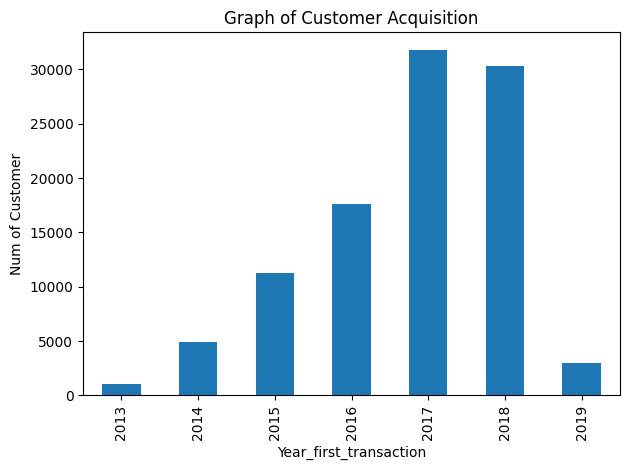

In [9]:
#membuat kolom baru dimana kolom 'First_Transaction' menjadi tahun
df_copy['Year_First_Transaction'] = df_copy['First_Transaction'].dt.year
#Visualisasi trend jumlah pelanggan per tahunnya dengan menggunakan bar chart
import matplotlib.pyplot as plt
df_year = df_copy.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_first_transaction')
plt.ylabel('Num of Customer')
plt.tight_layout()
plt.show()

Transaction by Year

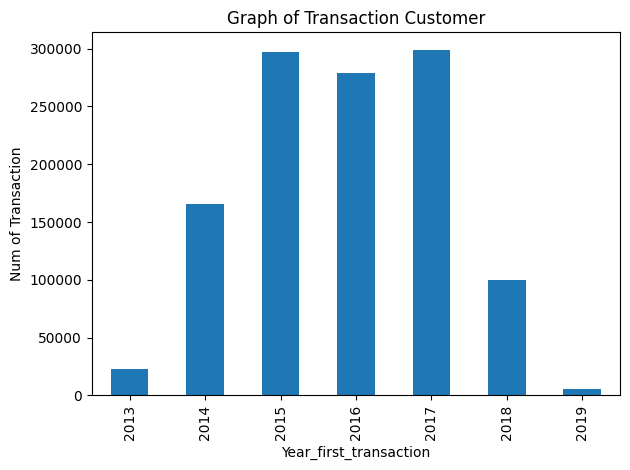

In [10]:
df_year_transaction = df_copy.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year_transaction.plot(x='Year_First_Transaction',
                         y='Count_Transaction',
                         kind='bar',
                         title='Graph of Transaction Customer')
plt.xlabel('Year_first_transaction')
plt.ylabel('Num of Transaction')
plt.tight_layout()
plt.show()

Average transaction amount by year

<ipython-input-11-54ce1eb17bdc>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.pointplot(data = df_copy.groupby(['Year_First_Transaction', 'Product']).mean().reset_index(),


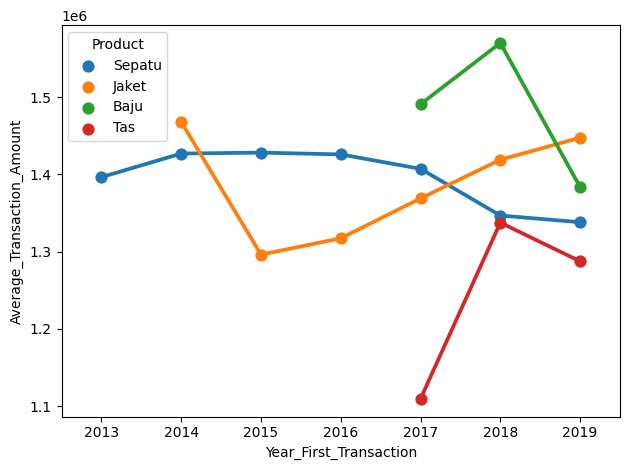

In [11]:
import seaborn as sns

plt.clf()
sns.pointplot(data = df_copy.groupby(['Year_First_Transaction', 'Product']).mean().reset_index(),
              x='Year_First_Transaction',
              y='Average_Transaction_Amount',
              hue='Product')
plt.tight_layout()
plt.show()

Proportion of churned customers for each product using a pie chart

Product   Baju  Jaket  Sepatu   Tas
is_churn                           
False     1268  11123   16064  4976
True      2144  23827   33090  7508


<Figure size 640x480 with 0 Axes>

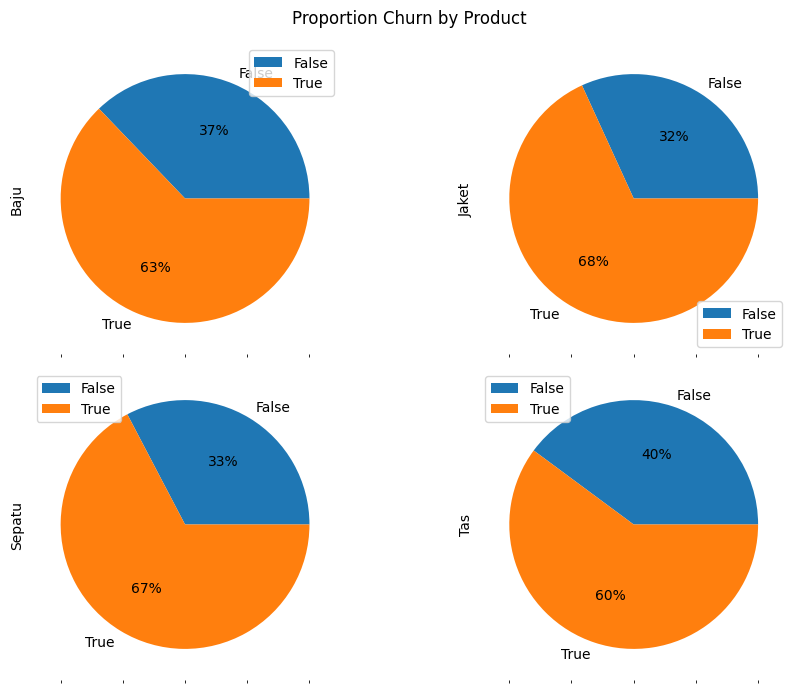

In [12]:
plt.clf()

df_piv = df_copy.pivot_table(index='is_churn',
                        columns='Product',
                        values='Customer_ID',
                        aggfunc='count',
                        fill_value=0)
print(df_piv)

plot_product = df_piv.count().sort_values(ascending=False).head(5).index

df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

Distribution of transaction count categorization

   Customer_ID Product       First_Transaction        Last_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.396 2018-10-05 05:48:02.608   
1        29531  Sepatu 2014-07-23 01:02:11.494 2018-12-25 11:02:41.270   
2       141526     Tas 2017-04-28 03:12:27.000 2019-01-24 09:40:02.000   
3       141526   Jaket 2017-04-28 06:52:52.547 2019-01-16 13:00:03.911   
4        37545  Sepatu 2015-04-16 10:01:38.531 2018-11-22 12:53:41.530   

   Average_Transaction_Amount  Count_Transaction is_churn  \
0                     1467681                 22    False   
1                     1269337                 41    False   
2                      310915                 30    False   
3                      722632                 27    False   
4                     1775036                 25    False   

   Year_First_Transaction Count_Transaction_Group  
0                    2016                 5. > 10  
1                    2014                 5. > 10  
2                    2017       

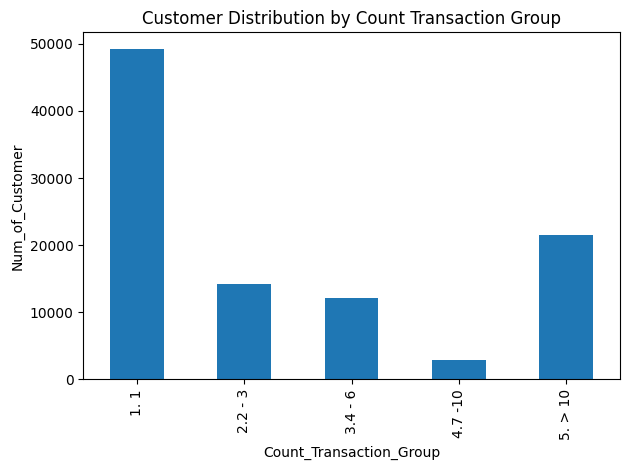

In [13]:
plt.clf()

def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2.2 - 3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='3.4 - 6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val ='4.7 -10'
    else:
        val ='5. > 10'
    return val
# add new column
df_copy['Count_Transaction_Group'] = df.apply(func, axis=1)
print(df_copy.head())

df_year = df_copy.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group',
             y='Customer_ID',
             kind='bar',
             title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Distribution of average transaction amount categorization

   Customer_ID Product       First_Transaction        Last_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.396 2018-10-05 05:48:02.608   
1        29531  Sepatu 2014-07-23 01:02:11.494 2018-12-25 11:02:41.270   
2       141526     Tas 2017-04-28 03:12:27.000 2019-01-24 09:40:02.000   
3       141526   Jaket 2017-04-28 06:52:52.547 2019-01-16 13:00:03.911   
4        37545  Sepatu 2015-04-16 10:01:38.531 2018-11-22 12:53:41.530   

   Average_Transaction_Amount  Count_Transaction is_churn  \
0                     1467681                 22    False   
1                     1269337                 41    False   
2                      310915                 30    False   
3                      722632                 27    False   
4                     1775036                 25    False   

   Year_First_Transaction Count_Transaction_Group  Average_Transaction_Group  
0                    2016                 5. > 10  5. >1.000.000 - 2.500.000  
1                    2014     

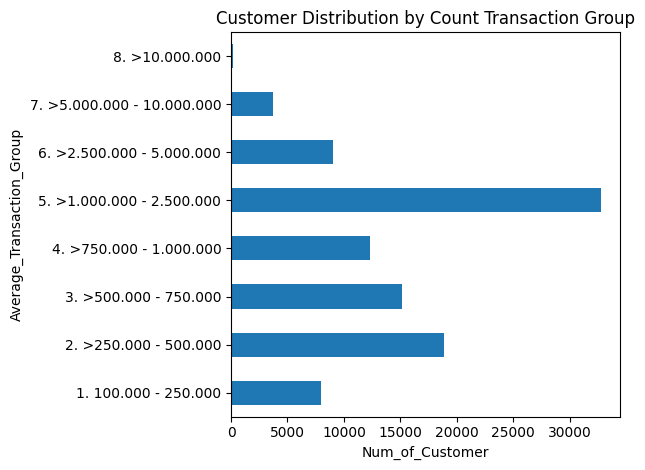

In [14]:
plt.clf()
#Categorization of transaction amounts
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <= 250000):
        val = '1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <= 750000):
        val ='3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <= 1000000):
        val ='4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val ='5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val ='6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val ='7. >5.000.000 - 10.000.000'
    else:
        val ='8. >10.000.000'
    return val
# add new column
df_copy['Average_Transaction_Group'] = df_copy.apply(f, axis=1)
print(df_copy.head())

df_year = df_copy.groupby(['Average_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Group',
             y='Customer_ID',
             kind='barh',
             title='Customer Distribution by Count Transaction Group')
plt.figsize=(500, 100)
plt.xlabel('Num_of_Customer')
plt.ylabel('Average_Transaction_Group')
plt.tight_layout()
plt.show()

Machine Learning (Logistic Regression)

check for missing values

In [15]:
print('\namount of missing value\n', df_copy.isnull().sum())
print(df_copy.dtypes)


amount of missing value
 Customer_ID                   0
Product                       0
First_Transaction             0
Last_Transaction              0
Average_Transaction_Amount    0
Count_Transaction             0
is_churn                      0
Year_First_Transaction        0
Count_Transaction_Group       0
Average_Transaction_Group     0
dtype: int64
Customer_ID                            int64
Product                               object
First_Transaction             datetime64[ns]
Last_Transaction              datetime64[ns]
Average_Transaction_Amount             int64
Count_Transaction                      int64
is_churn                              object
Year_First_Transaction                 int64
Count_Transaction_Group               object
Average_Transaction_Group             object
dtype: object


change the data type of column 'is_churn' from obj to boolean

In [16]:
df_copy['is_churn']=df_copy['is_churn'].astype('bool')
print(df_copy.dtypes)

Customer_ID                            int64
Product                               object
First_Transaction             datetime64[ns]
Last_Transaction              datetime64[ns]
Average_Transaction_Amount             int64
Count_Transaction                      int64
is_churn                                bool
Year_First_Transaction                 int64
Count_Transaction_Group               object
Average_Transaction_Group             object
dtype: object


Fitur / Feature

In [17]:
# Feature column: Year_Diff
df_copy['Year_Last_Transaction'] = df_copy['Last_Transaction'].dt.year
df_copy['Year_Diff'] = df_copy['Year_Last_Transaction'] - df_copy['Year_First_Transaction']

# feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

Feature dan Target

In [18]:
# variabel features
X = df_copy[feature_columns]

#variabel target
y = df_copy['is_churn']

Split X and y into training and testing

In [19]:
#divide the data into train data and test data with a division of 85:15
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

Make a modelling of Logistic Regression

In [20]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=0)

# fit the model with data
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

Evaluate the model using a confusion matrix

In [21]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('confusion_matrix\n',cnf_matrix)

confusion_matrix
 [[    0  4983]
 [    0 10017]]


Confusion Matrix visualization using heatmap from seaborn

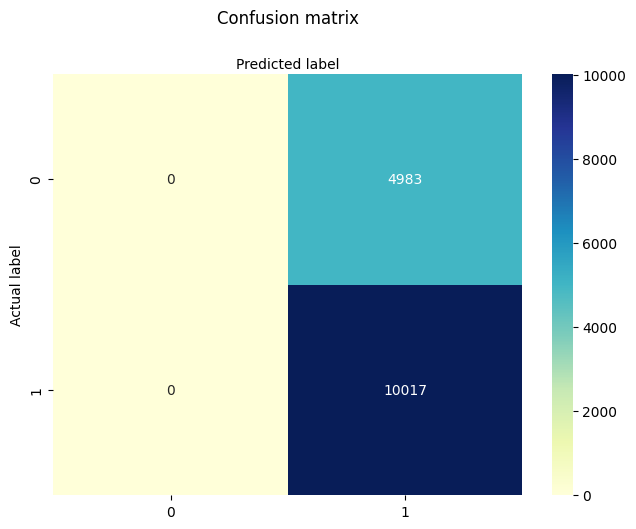

In [22]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Accuracy, Precision, dan Recall

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.6678
Precision: 0.6678
Recall   : 0.6678


Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

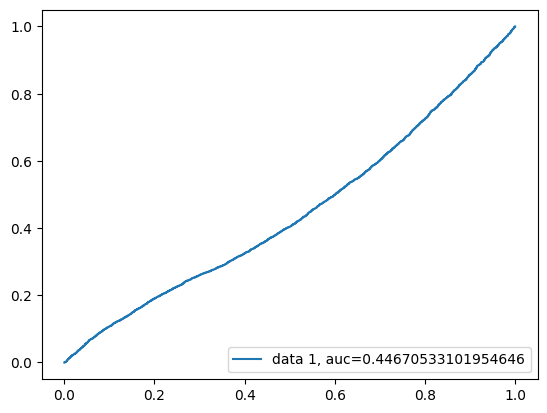

In [24]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()